<h1 align="center";>
    <img style="float: right; padding-bottom:40px;" src="https://raw.githubusercontent.com/yaseen157/carpy/main/branding/logo_primary.png" width="300"/>
</h1>

# Quantity objects

#### 📖 <span style="color:#5a83ab">Learning Objectives</span>

In this notebook you will...

> ... learn what `Quantity` objects are.<br>
> ... understand how to create `Quantity` objects.<br>
> ... know how to manipulate `Quantity` objects to your benefit.

## NumPy arrays

One of the scientific Python community's most iconic libraries is the [NumPy](https://github.com/numpy/numpy) library.
The fundamental `ndarray` object provided by NumPy allows users to manipulate n-dimensional arrays of values.
Mathematically, you might have heard these described more generally as tensors.

<div align="center">
    <img src="../../_static/tensors.svg"
        title="Assorted tensors from rank 0 to 3"
        alt="A visualisation to assist user understanding of tensor rank, shape, and dimension nomenclature"
        style="display: block; border: none; padding: 30px; width: 80%">
</div>

Tensors can have any number of dimensions and are frequently used in machine learning to describe multi-dimensional datasets.

<div class="alert alert-block alert-info"> <b>💡 Tip:</b>
    An example of an everyday tensor is a rank 3 tensor which might describe the attributes of individual pixels on a computer screen.
    Each pixel requires a rank 1 tensor of shape (3,) to store spectral information (perhaps in the RGB colour space) and two more dimensions to describe its x and y position on the display.
    A full HD image could then feasibly be described by a rank 3 tensor of shape (1080, 1920, 3).
</div>

For illustrative purposes, we'll create a simple one-dimensional array using NumPy's `ndarray` objects below:

In [1]:
# Define some one-dimensional data
velocities = [-2, 0, 1.5, 2.1]  # 1D data

In [2]:
# Creating an array with NumPy...
import numpy as np

arr1 = np.array(velocities)

# Print array to the notebook output
print(f"arr1 = {repr(arr1)}\n")

print(f"type(arr1) = {type(arr1)}")
print(f"number of dimensions = {arr1.ndim}\n")

arr1 = array([-2. ,  0. ,  1.5,  2.1])

type(arr1) = <class 'numpy.ndarray'>
number of dimensions = 1



## CARPy Quantities

Users of NumPy will be comfortable with the idea of using a CARPy `Quantity` object in its place.
The `Quantity` object *subclasses* the `ndarray` class - which simply means that `Quantity` objects are *children* that behave very similarly to their `ndarray` *parent* class.

In [3]:
# Creating an array with CARPy...
from carpy.utility import Quantity

qty1 = Quantity(velocities)

# Print quantity to the notebook output
print(f"qty1 = {repr(qty1)}\n")

print(f"type(qty1) = {type(qty1)}")
print(f"number of dimensions = {qty1.ndim}\n")

qty1 = Quantity([-2. ,  0. ,  1.5,  2.1], no_unit)

type(qty1) = <class 'carpy.utility._unitconversion.Quantity'>
number of dimensions = 1



`Quantity` objects differ from their `ndarray` parents in that they can be assigned units of measurement that can be manipulated with regular Python operators like `*`, `+`, `/`, `-`, `**`, etc.:

In [4]:
# Create Quantity objects with values and units
qty1 = Quantity(velocities, "m s^-1")
qty2 = Quantity(120, "lb")

# Manipulate your Quantity objects: The product of mass and velocity is momentum
qty3 = qty2 * qty1

# Display computed momentum
print(f"qty3 = {repr(qty3)}\n")

qty3 = Quantity([-108.8621688 ,    0.        ,   81.6466266 ,  114.30527724], kg m s^{-1})



So long as a unit is instantiated with the pattern `<unit_1> <unit_2> ... <unit_n>` (make sure to include the whitepsace between units), the values are converted into SI in the background, and then propagated to any child arrays.

## Specifics of reading `Quantity` values

### `repr()` vs `str()`

For your convenience, `Quantity` objects can be presented in two ways.
1. From `__repr__` - what you usually get when you type something into your Python console, i.e. a *representation* of the object. Your preferred code development environment will use the function `repr()` to obtain this string representation of your object.
2. From `__str__` - what you usually get when you print something using `print()`, i.e. the *string* version of the object. The `print()` function will use the function `str()` to obtain this pretty string of your object.

As a rule of thumb, `__repr__` tends to be (but is not always) a form of the object that the user can copy directly from console, paste it back into the console, and instantiate a brand new object with it. The `__str__` version is prettier to look at.

Here's what that looks like for the original `ndarray` objects:

In [5]:
print("NumPy array presentation:\n")
print(f"__repr__ style: {repr(arr1)}")
print(f"__str__ style: {str(arr1)}\n")

NumPy array presentation:

__repr__ style: array([-2. ,  0. ,  1.5,  2.1])
__str__ style: [-2.   0.   1.5  2.1]



In most cases, something similar will happen for `Quantity` objects - that is unless the `Quantity` object you were using came from a non-SI unit:

In [6]:
print("CARPy Quantity presentation:\n")
print(f"__repr__ style: {repr(qty2)}")
print(f"__str__ style: {str(qty2)}\n")

CARPy Quantity presentation:

__repr__ style: Quantity([54.4310844], kg)
__str__ style: [120.] lb



This is primarily so when you are coding, the `__repr__` format presents you with numbers that are mathematically consistent.
On the other hand, when you are presenting or writing data, you are more likely to want the `__str__` version.

### `.x`, `.to()`, `.u`, and `.m`

If you need to access the original `ndarray` values inside of a `Quantity` (perhaps due to an incompatibility or issue), you can use the `.x` property:

In [7]:
print(f"qty2.x: {repr(qty2.x)}\n")

qty2.x: array([54.4310844])



<div class="alert alert-block alert-info"> <b>📝 Note:</b>
    Although we instantiated qty2 with 120 lbs, the <b><tt>.x</tt></b> property returned the value in SI base units of kilograms.
    The reason for this decision is that users who call methods that are incompatible with <b><tt>Quantity</tt></b> may still wish to access the values being represented.
    In such a case, it is far more likely that the user will want the SI values, as the more mathematically consistent unit system.
</div>

If this is unacceptable, you can make use of the `.to()` method which accepts a unit string as an argument:

In [8]:
# Present qty2 in units of stone
print(f"{qty2} is {qty2.to('st')} stone")

[120.] lb is [8.57142857] stone


If you want the original units with which a `Quantity` was established, use the `.u` property:

In [9]:
# Find out with what units qty3 was instantiated with
print(f"qty3.u = {qty3.u}\n")

qty3.u = kg m s^{-1}



And finally, the `.m` property provides the unit string from `.u` formatted with matplotlib compatible mathtext:

In [10]:
print(f"qty3.m = {qty3.m}\n")

qty3.m = kg m s$^{-1}$



<div class="alert alert-block alert-info"> <b>💡 Tip:</b>
If you would like to use <b><tt>Quantity</tt></b> objects in a computation and then plot the results in terms of the original units, <b><tt>.u</tt></b>, <b><tt>.m</tt></b>, and <b><tt>.to()</tt></b> will come in very handy!
</div>

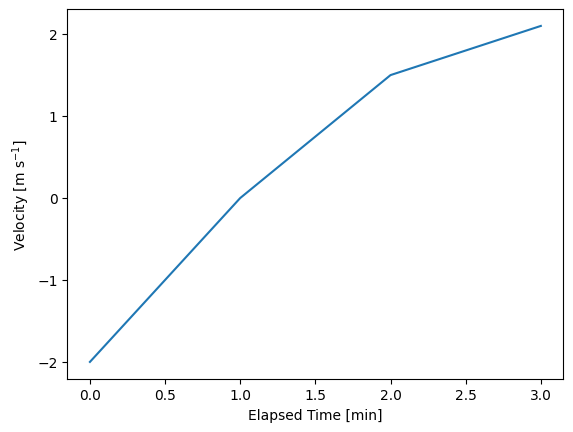

In [11]:
from matplotlib import pyplot as plt

t_elapsed = Quantity([0, 1, 2, 3], "min")
vs = Quantity(velocities, "m s^-1")

# Create a plot
fig, ax = plt.subplots()

# t_elapsed[seconds] casted to the units of t_elapsed, using .to() and .u
ax.plot(t_elapsed.to(t_elapsed.u), vs) 

# Label your plot as appropriate using mathscript from .m
ax.set_xlabel(f"Elapsed Time [{t_elapsed.m}]")
ax.set_ylabel(f"Velocity [{vs.m}]")

plt.show()

## A quick chat about radians and steradians

`Quantity` does its best to preserve dimensionality of units through computations but this is not always practicable.
For example, take the formula for force due to centripetal motion

$$F=ma \quad \text{with} \quad a = \frac{v^2}{r} \quad \longrightarrow \quad F = m\frac{v^2}{r}$$

Ostensibly, the units of force $F$ are the products of consitutent terms mass $m$, tangential speed $v$, and radius of gyration $r$

$$[kg \cdot ms^{-2}] = [kg] \times \frac{[m^2s^{-2}]}{[m]}$$

But the tangential speed $v$ is related to radius of gyration $r$ through $v = r \cdot \omega$, where $\omega$ is the angular velocity in radians per second.
We're left with the problem that 

$$[ms^{-1}] \neq [m] \cdot [rad \; s^{-1}] \quad \text{???}$$

in the case that SI-derived ratio "units" (radians, steradians) are treated with the same dimensional rules as the other base units.
The solution is that radians and steradians are treated as dimensionless, and have values equal to 1 - allowing them to appear and disappear from analysis as required.
As a result, `Quantity` objects may spawn these ghostly radian or steradian units during trigonometric operations, or delete them outright if the `Quantity` deems it inappropriate to propagate the unit:

In [12]:
# The rule for propagation is if it's not adding or subtracting, don't propagate it
omega = Quantity(60, "rpm")
radius = Quantity(5, "m")

v_t = radius * omega

print(f"{repr(v_t)} = {repr(radius)} x {repr(omega)}")

Quantity([31.41592654], m s^{-1}) = Quantity([5], m) x Quantity([6.28318531], s^{-1} rad)


In [13]:
# Users can force as many radians as they want into a unit (not sure why you'd want to!)
v_t.to("rad^68 m s^-1")

array([31.41592654])

In [14]:
# Trigonometry can spawn radian units - the result is angular after all
np.arctan(Quantity(1, None))

Quantity([0.78539816], rad)

## Implications for compute speed

Using the `timeit` code profiler, we can examine the compute speed for a simple multiplication with and without `Quantity` objects

In [15]:
import timeit

# Setup statements - these are not timed
setup_numpy = """import numpy as np; w, r = np.array([[60], [5]]);"""
setup_carpy = """from carpy.utility import Quantity; w, r = Quantity(60, "rpm"), Quantity(5, "m");"""

# The statement will be executed a number of times, and timed
statement = "w * r"
number = 2_000
t1 = timeit.timeit(setup=setup_numpy, stmt=statement, number=number)
t2 = timeit.timeit(setup=setup_carpy, stmt=statement, number=number)

print(f"Average run time per execution ({number} executions):")
print(f"... with NumPy: {t1/number:.6e} seconds (total = {t1:.6f} s)")
print(f"... with CARPy: {t2/number:.6e} seconds (total = {t2:.6f} s)")
print()
print(f"(CARPy Quantity manipulation is ~{np.log10(t2/t1):.0f} orders of magnitude slower than vanilla array work)")

Average run time per execution (2000 executions):
... with NumPy: 2.495500e-07 seconds (total = 0.000499 s)
... with CARPy: 3.482435e-04 seconds (total = 0.696487 s)

(CARPy Quantity manipulation is ~3 orders of magnitude slower than vanilla array work)


In [16]:
# Advanced run time profiling stats
import cProfile
import pstats

cProfile.run("[omega * radius for _ in range(1000)]", sort=pstats.SortKey.CUMULATIVE)

         1552137 function calls (1534123 primitive calls) in 0.610 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.610    0.610 {built-in method builtins.exec}
        1    0.000    0.000    0.610    0.610 <string>:1(<module>)
        1    0.001    0.001    0.610    0.610 <string>:1(<listcomp>)
     1000    0.004    0.000    0.609    0.001 _unitconversion.py:758(__mul__)
     1000    0.007    0.000    0.566    0.001 _unitconversion.py:254(__mul__)
     2000    0.032    0.000    0.504    0.000 _unitconversion.py:43(__new__)
     2000    0.068    0.000    0.128    0.000 _unitconversion.py:101(<dictcomp>)
    23000    0.006    0.000    0.126    0.000 frame.py:1184(__getitem__)
    23000    0.015    0.000    0.120    0.000 getitem.py:125(get_df_item_by_key)
     2000    0.002    0.000    0.102    0.000 frame.py:1571(to_numpy)
     2000    0.100    0.000    0.100    0.000 {method 'to_numpy' of 